# Visualization Best Practices in R

### Course Description
This course will help you take your data visualization skills beyond the basics and hone them into a powerful member of your data science toolkit. Over the lessons we will use two interesting open datasets to cover different types of data (proportions, point-data, single distributions, and multiple distributions) and discuss the pros and cons of the most common visualizations. In addition, we will cover some less common alternatives visualizations for the data types and how to tweak default ggplot settings to most efficiently and effectively get your message across.

### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=10, repr.plot.height=3)
    grid.arrange(a1, a2,a3, nrow = 1)
    
### Note2 Generate a table 
https://www.tablesgenerator.com/markdown_tables

### Note 3 - DataFrames

In [ ]:
library(dplyr)
library(ggplot2)
library(readr)
library(tidyr)
library(gridExtra)

path_csv<-"https://assets.datacamp.com/production/repositories/1864/datasets/71386124a72f58a50fbc07b8254f47ef9a867ebe/who_disease.csv"
who_disease<-read_csv(path_csv)

interestingCountries<-c("NGA","SDN","FRA","NPL","MYS","TZA","YEM","UKR","BGD","VNM")
who_subset<-who_disease %>%
  filter(countryCode %in% interestingCountries, disease == "measles" , year %in% c ("2006","2016")) %>% 
  mutate(year = paste('cases_',year)) %>% 
  spread(year, cases)



## 1) Proportions of a whole
In this chapter, we focus on visualizing proportions of a whole; we see that pie charts really aren't so bad, along with discussing the waffle chart and stacked bars for comparing multiple proportions.

### 1.1) (video) Course/Grammar of Grapichs intro

#### 1.1.1) Familiarizing with disease data
The dataset containing disease cases from the World Health Organization (WHO) is loaded into your environment as the dataframe `who_disease`.

In order to familiarize yourself with the data, let's start by printing it to the console.

Once you've investigated it a bit, make a simple bar chart of the number of observations by region using the supplied code. You will need to fill in the aes()thetics function to map the x-axis to the proper column name.

**Exercise**
1. Print dataframe by simply calling the it: who_disease.
2. Modify ggplot code so aes() contains the region as its x-axis mapping

*Answears*

region,countryCode,country,disease,year,cases
EMR,AFG,Afghanistan,measles,2016,638
EUR,ALB,Albania,measles,2016,17
AFR,DZA,Algeria,measles,2016,41
EUR,AND,Andorra,measles,2016,0
AFR,AGO,Angola,measles,2016,53
AMR,ATG,Antigua and Barbuda,measles,2016,0


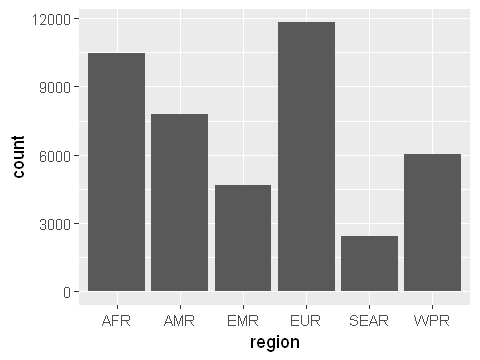

In [3]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

# print dataframe to inspect
head(who_disease)

# set x aesthetic to region column
ggplot(who_disease, aes(x = region)) + geom_bar()

#### 1.1.2) Warming up data-wrangling
Let's warm up your tidyverse data wrangling skills a bit and look at the number of cases reported by year for the American region ('AMR').

To do this, we will first filter the dataset to our desired region, then make a simple scatter plot of the  `year` by `cases`.

In addition, set the opacity of the points to 50% (0.5) so we can get a sense of data overlap.

**Exercise**    

*Answears*

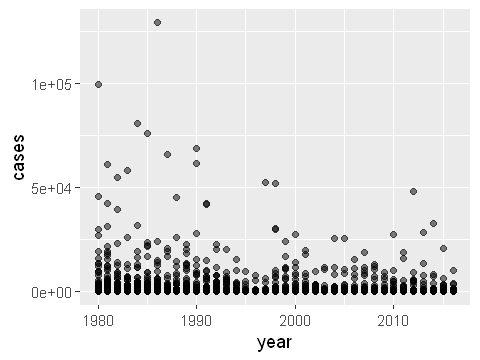

In [4]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)


# filter data to AMR region. 
amr_region <- who_disease %>%
filter(region ==  'AMR')

# map x to year and y to cases. 
ggplot(amr_region, aes(x = year, y = cases)) + 
# lower alpha to 0.5 to see overlap 
geom_point(alpha = .5)

### 1.2) (video) The Pie Chart and its friends

#### 1.2.1) The infamous P-I-E
Intuitively, you can think about a pie chart as a `stacked bar chart` that has been 'wrapped' around some central axis. Conveniently, this intuition fits very well with how they are made in ggplot2.

Supplied is code to summarize our who_disease data into a dataframe containing three diseases: measles, mumps, and,other, along with their total number of cases in the data.

Your job is to turn the empty ggplot object into a `stacked bar-chart`, then into a `pie-chart` by using the transform `coord_polar(theta = 'y')`.

Notice how I have set `x = 1` in the aesthetics. This is because **we only want one bar chart here**. We'll learn about multiple stacked bar charts in the next lesson!
  
**Exercise**    
1. Add a column geometry (geom_col()) to the supplied ggplot object.
2. Switch to polar coordinates by adding coord_polar()

*Answears*

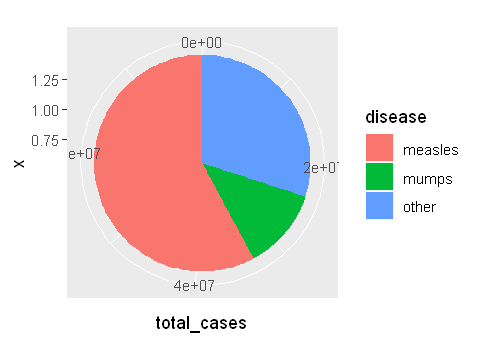

In [5]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

# Wrangle data into form we want. 
disease_counts <- who_disease %>%
mutate(disease = ifelse(disease %in% c('measles', 'mumps'), disease, 'other')) %>%
group_by(disease) %>%
summarise(total_cases = sum(cases))

ggplot(disease_counts, aes(x = 1, y = total_cases, fill = disease)) +
# Use a column geometry.
geom_col() +
# Change coordinate system to polar and set theta to 'y'.
coord_polar(theta = 'y')


#### 1.2.2) Cleaning up the pie
The pie chart you made in the last plot is good, but it's a little cluttered. Let's clean it up using the ggplot function `theme_void()` along with giving it a meaningful title with `ggtitle(...)`.

The disease_counts summarized dataframe from the last exercise is already loaded for you.

**Exercise** 
  1. Add theme_void() to the ggplot object to clean up the background.
2. Give the plot the title 'Proportion of diseases'

*Answears*

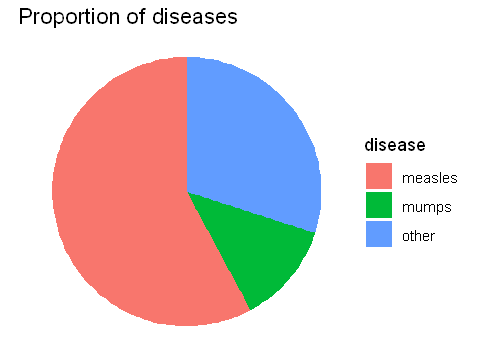

In [6]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

  
  # Wrangle data into form we want. 
  disease_counts <- who_disease %>%
  mutate(disease = ifelse(disease %in% c('measles', 'mumps'), disease, 'other')) %>%
  group_by(disease) %>%
  summarise(total_cases = sum(cases))

ggplot(disease_counts, aes(x = 1, y = total_cases, fill = disease)) +
  # Use a column geometry.
  geom_col() +
  # Change coordinate system to polar.
  coord_polar(theta = "y") +
  # Clean up the background with theme_void and give it a proper title with ggtitle.
  theme_void() +
  ggtitle('Proportion of diseases')

#### 1.2.3) How about a waffle?
What if we are interested in the details of the 'other' class?
  
  Let's make the switch to a `waffle chart`, as they are capable of dealing with more classes. We'll use the same data-manipulation pipeline from the last exercise, but this time with all the diseases left in.

We will use the library `waffle` which contains the function `waffle()`. This function produces a waffle chart for you when supplied with a named vector of counts.

It will draw one square for each unit supplied in the vector, so we need to manipulate our disease counts to rounded percents (note the mutate() call in the supplied data wrangling code).

**Exercise**    
1. Give the case_counts vector names using the names() function.
2. Call the waffle() function in the library waffle with the case_counts vector supplied as an argument.


*Answears*


Warning message:
"package 'waffle' was built under R version 3.5.3"

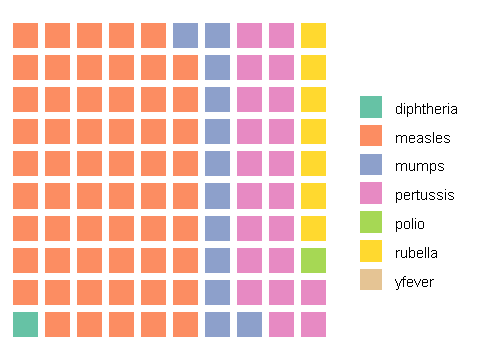

In [7]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=4, repr.plot.height=3)

  
  library(waffle)
disease_counts <- who_disease %>%
  group_by(disease) %>%
  summarise(total_cases = sum(cases)) %>% 
  mutate(percent = round(total_cases/sum(total_cases)*100))

# Create an array of rounded percentages for diseases.
case_counts <- disease_counts$percent

# Name the percentage array with disease_counts$disease
names(case_counts)<-disease_counts$disease

# Pass case_counts vector to the waffle function to plot
waffle(case_counts)

### 1.3) (video) When to use bars

#### 1.3.1) Basic stacked bars
When we made the pie and waffle charts in the last exercises, we looked at all years in the data combined together.

Now, we're interested in looking at these patterns over time. To do this we will make a stacked bar chart with the x-axis being the year of observation. Like we did with the pie chart before, we will simplify the data to just be measles, mumps, and other.

Do you notice anything funky in the data after visualizing it this way?

**Exercise**  
1. Modify the aes() call to include the year mapped to the x-axis.
2. Make bars fill the entire y-axis by adjusting position argument in geom_col()

*Answears*

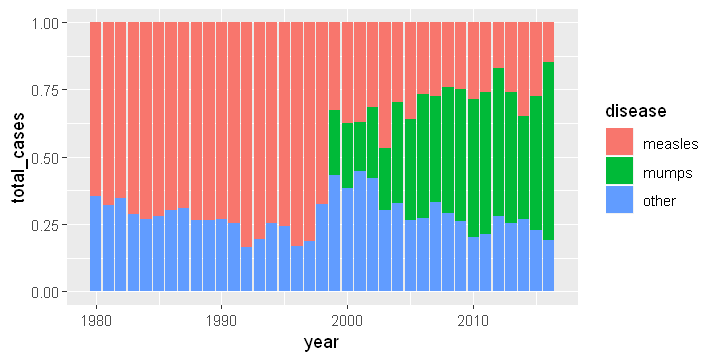

In [9]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=3)


disease_counts <- who_disease %>%
mutate(disease = ifelse(disease %in% c('measles', 'mumps'), disease, 'other')) %>%
group_by(disease, year) %>% # note the addition of year to the grouping.
summarise(total_cases = sum(cases))

# add the mapping of year to the x axis. 
ggplot(disease_counts, aes(x = year, y = total_cases, fill = disease)) +
# Change the position argument to make bars full height
geom_col(position = "fill")

#### 1.3.2) Ordering stack for readability
In the last plot since we grouped all diseases that are not measles and mumps into their own category, it's fair to assume that we care less about the 'other' category's trajectory than those of measles and mumps.

Because of this, the plot we made has a problem. The way that the bars are stacked, with measles on top, mumps in the middle, and other on the bottom, makes it hard to get a good intuition for the behavior of mumps over time because its baseline is non-constant due to changing values in measles proportions.

Ggplot orders the bars and legend based upon the order it sees the variables in the dataset. To override this, turn the disease column into a factor with the `levels` in the order we want our plot to use.

**Exercise**  
1. Change the mutate function in the data-manipulation pipeline to turn disease into a factor with levels = c('measles', 'other', 'mumps').
2. Re-plot using the same code as the last exercise.

*Answears*

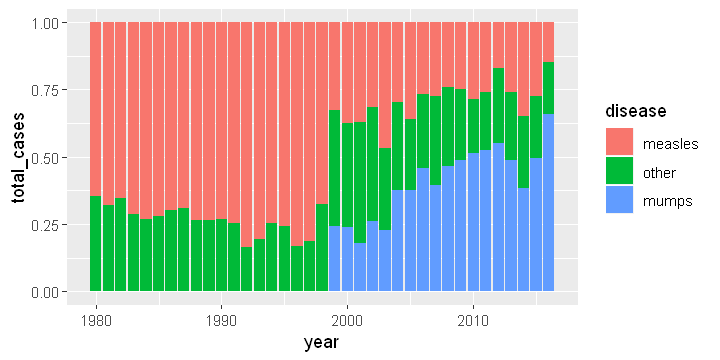

In [11]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=3)

disease_counts <- who_disease %>%
mutate(
disease = ifelse(disease %in% c('measles', 'mumps'), disease, 'other') %>% 
factor(levels = c('measles', 'other', 'mumps')) # change factor levels to desired ordering
) %>%
group_by(disease, year) %>%
summarise(total_cases = sum(cases)) 

# plot
ggplot(disease_counts, aes(x = year, y = total_cases, fill = disease)) +
geom_col(position = 'fill')


#### 1.3.3) Categorical x-axis
In the previous charts, we saw that mumps didn't start getting reported until 1999, making comparisons before then meaningless.

Let's filter the data to be only the cases reported on or after 1999 and then make a stacked bar chart looking at the proportion of different diseases by region.

Modify the data-manipulation pipeline to get the data into the form you want, then build your stacked bar chart and plot! Don't worry about ordering the bars here as we did in the last exercise. See any surprising patterns?

**Exercise**  
1. Filter who_disease data to only years 1999 and later.
2. Add to group_by() to keep region information in summary.
3. Fill out aesthetics with x = region, y = total_cases, and fill = disease.

*Answears*
 

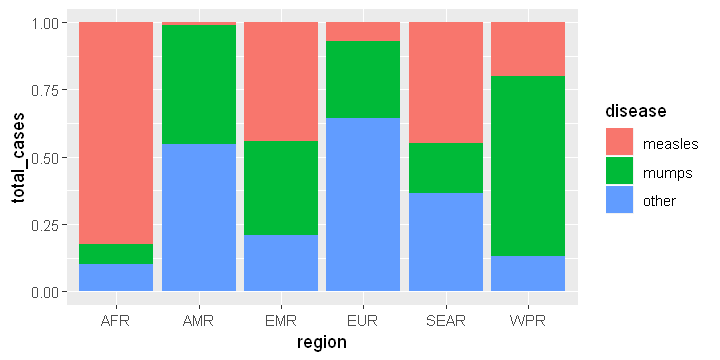

In [13]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=3)

disease_counts <- who_disease %>%
# Filter to on or later than 1999
filter(year >= 1999) %>% 
mutate(disease = ifelse(disease %in% c('measles', 'mumps'), disease, 'other')) %>%
group_by(disease, region) %>%    # Add region to grouping
summarise(total_cases = sum(cases))

# Set aesthetics so disease is the stacking variable, region is the x-axis and counts are the y
ggplot(disease_counts, aes(x = region, y = total_cases, fill = disease)) +
# Add a column geometry with the proper position value. 
geom_col(position = 'fill')



## 2.0) Point data
We shift our focus now to single-observation or point data and go over when bar charts are appropriate and when they are not, what to use when they are not, and general perception-based enhancements for your charts.

### 2.1) (video) Point Data

#### 2.1.1) Working with geom_col
In ggplot, there are two different ways to make bar plots: `geom_col()` and `geom_bar()`.

If your data is in the form where the height of the bar is encoded in a column that you want to map to the y-axis, like counts of diseases are in our data, you want to use the `geom_col()` option.

Let's make a barplot of the number of cases recorded by disease for India in 1980 using `geom_col()`.

**Exercise**  
1. filter() the data to the country of India and the year 1980 with country == "India", year == 1980.
2. Map disease to the x-axis and cases to the y-axis in the aes() call.
3. Add a geom_col() geometry.

*Answears*

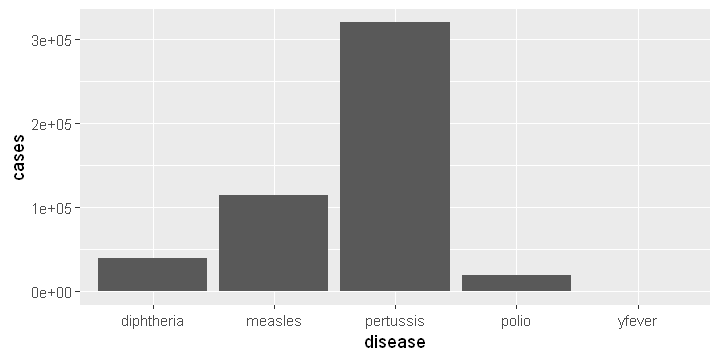

In [14]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=3)


who_disease %>% 
# filter to india in 1980
filter(country == "India", year == 1980) %>% 
# map x aesthetic to disease and y to cases
ggplot(aes(x = disease, y = cases )) +
# use geom_col to draw
geom_col()


#### 2.1.2) Wrangling geom_bar
Whereas `geom_col()` expects you to pass it a y-axis mapping column, `geom_bar()` doesn't take a y-axis call (at least by default).

Instead, `geom_bar()` takes your x-axis mapping and counts every single observation (or row of the passed dataframe) for each class and then draws bars of corresponding heights

These two code chunks will give you the same plot:
  
    # geom_col()
    data %>%
    groupby(xAxisCol) %>%
    summarize(value = n()) %>%
    ggplot(aes(x = xAxisCol, y = value) + 
    geom_col()
         
    # geom_bar()
    data %>%
    ggplot(aes(x = xAxisCol)) +
    geom_bar()

Let's use `geom_bar()` to make a look at observations with a large number of cases by region our WHO data.

**Exercise**

1. filter() the who_disease data into only observations (rows) with greater than 1000 cases.
2. Map the x-axis to the region column.
3. Add geom_bar() to the plot object to draw the bars.
*Answears*

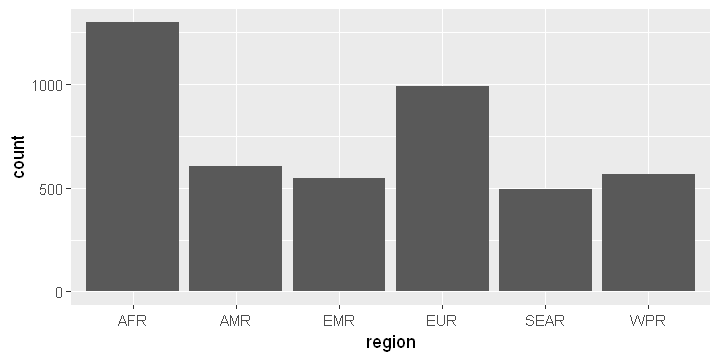

In [15]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=3)

who_disease %>%
# filter data to observations of greater than 1,000 cases
filter(cases > 1000) %>%
# map the x-axis to the region column
ggplot(aes(x = region)) + 
# add a geom_bar call 
geom_bar()

### 2.2) (video) Point Charts

#### 2.2.1) Ordered point chart
Let's start by improving the point plot we saw in the slides.

First, change the data manipulation pipeline to filter to the years 1992 and 2002 instead of the default 2006-2016. Note that the array interestingCountries has been loaded and is the same as in the slides.

Now modify the plotting code to plot the new data, but this time, let's reorder the y-axis in descending order of cases for 1992.

**Exercise**  
1. Modify filter() to pull the years 1992 and 2002.
2. Modify Aesthetics to:
* Plot the cases for 1992 by country.
* reorder() y-axis by the number of cases.

*Answears*

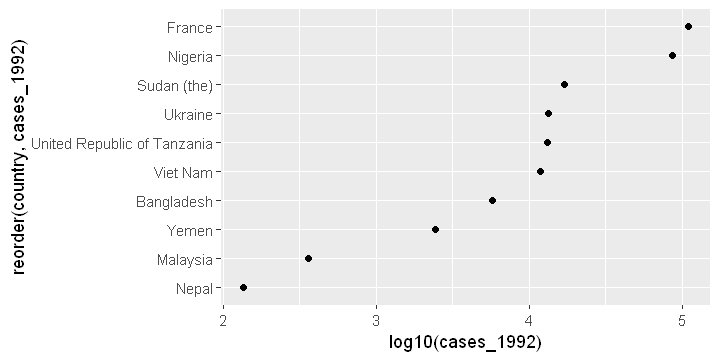

In [16]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=3)

 
 who_subset <- who_disease %>% 
 filter(
 countryCode %in% interestingCountries,
 disease == 'measles',
 year %in% c(1992, 2002) # Modify years to 1992 and 2002
 ) %>% 
 mutate(year = paste0('cases_', year)) %>% 
 spread(year, cases)
 
 # Reorder y axis and change the cases year to 1992
 ggplot(who_subset, aes(x = log10(cases_1992), y = reorder(country, cases_1992))) +
 geom_point()
 

#### 2.2.2) Adding visual anchors
A nice property of the log fold change is it is symmetric: a value of 1 means two times 'bigger', and -1 means two times 'smaller.' Due to this, the position of 0 on the x-axis marks the switch point between count declines and increases over years. When your data has a natural break-point like this, it is good if the chart shows it as a focal-point as well.

The code provided will make a basic point chart of the log fold change for the dates. To improve it, we will do two things. First, reorder the dots in descending order like in the previous exercise. Second, add a guideline at x = 0 to show the neutral point by adding `geom_vline()` (for `v`ertical `line`) to your plot object with the argument `xintercept` set to 0.


**Exercise**  
1. Order dots in descending by wrapping the y mapping in reorder().
2. Add visual anchor at x = 0 with geom_vline().

*Answears*

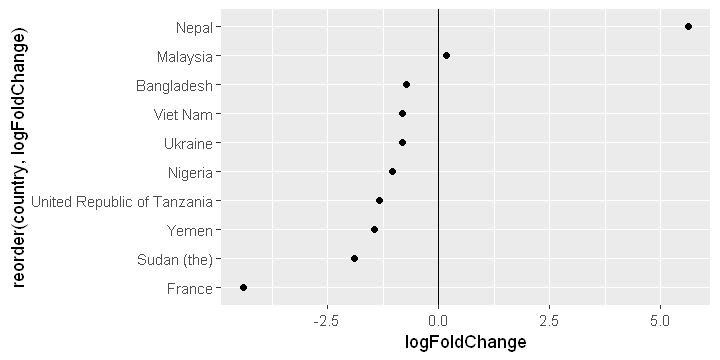

In [17]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=3)

who_subset %>% 
# calculate the log fold change between 2016 and 2006
mutate(logFoldChange = log2(cases_2002/cases_1992)) %>% 
# set y axis as country ordered with respect to logFoldChange
ggplot(aes(x = logFoldChange, y = reorder(country, logFoldChange))) +
geom_point() +
# add a visual anchor at x = 0
geom_vline(xintercept = 0)


#### 2.2.3) Faceting to show structure.
Taking the code from the last exercise, let's modify it to group the countries by their region by faceting.

This will help inject a bit more structure into the presentation while not overly complicating the chart.

We want to use `facet_grid()` here and keep all the plots in the same column, enabling easy comparisons outside of a region while still maintaining the region-level grouping.

You will also need to adjust the `scale` argument in `facet_grid()` in order to avoid repeating the entire y-axis structure for every facet.

**Exercise**  
1. Add facet_grid() to the code from the last plot and set its faceting variable to region~..
2. Set y-axis to be free by setting scale to 'free_y'.

*Answears*

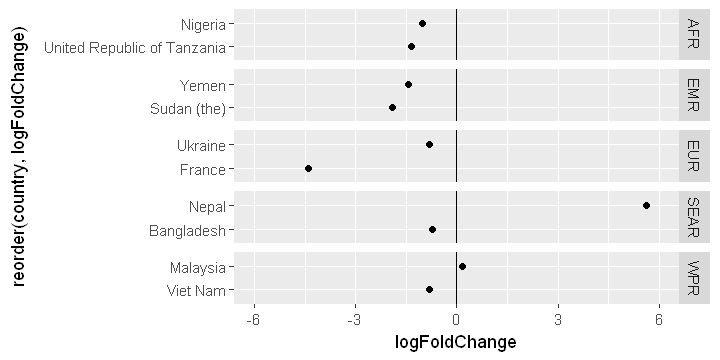

In [18]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=3)

who_subset %>% 
mutate(logFoldChange = log2(cases_2002/cases_1992)) %>% 
ggplot(aes(x = logFoldChange, y = reorder(country, logFoldChange))) +
geom_point() +
geom_vline(xintercept = 0) +
xlim(-6,6) +
# add facet_grid arranged in the column direction by region and free_y scales
facet_grid(region~., scales = 'free_y') 


 ### 2.3) (video) Tuning your charts
 
 #### 2.3.1) Let's flip some axes
 First, we can practice rotating a plot. Provided is code that makes a bar plot of the number of cases of pertussis in the Americas region (AMR) in 1980. You will notice it's almost unreadable.
 
 First, to help see patterns that may be in the data, reorder() the columns in descending order of cases.
 
 Next, let's coord_flip() the axes to make it possible to read the country names.
 
 **Exercise**  
   *Answears*

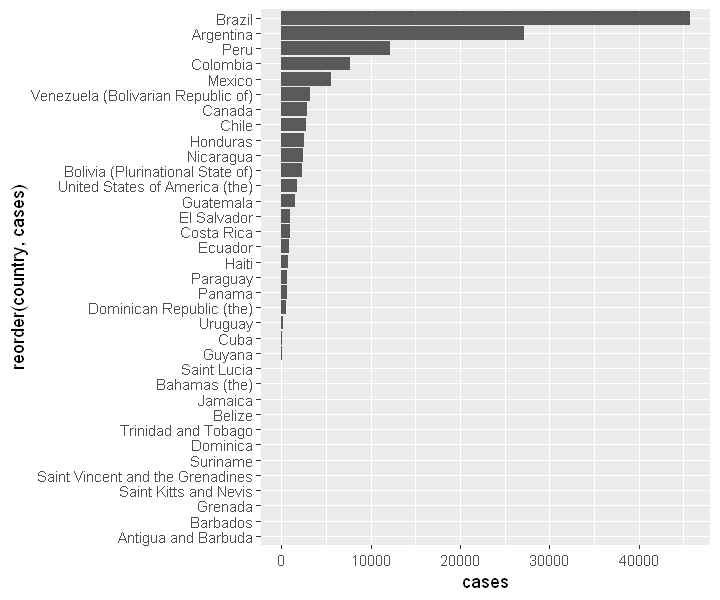

In [20]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=5)


amr_pertussis <- who_disease %>% 
filter(   # filter data to our desired subset
 region == 'AMR', 
 year == 1980, 
 disease == 'pertussis'
)


# Set x axis as country ordered with respect to cases. 
ggplot(amr_pertussis, aes(x = reorder(country, cases), y = cases)) +
geom_col() +
# flip axes
coord_flip()

#### 2.3.2) Cleaning up the bars
The changes we made to the last plot are great and improved it immensely, but we can go further!

We seem to have a few countries that have zero counts for the cases. Let's get rid of these to free up even more space for the country names to breath.

In addition, let's get rid of the unnecessary horizontal lines that are cluttering up the background.

The dataframe `amr_pertussis` that we made in the last exercise is already loaded for you.


**Exercise**  
1. Add a filter() to amr_pertussis so we only have countries that had more than zero cases.
2. Using the theme() function, remove the horizontal grid lines panel.grid.major.y from the background.

*Answears*

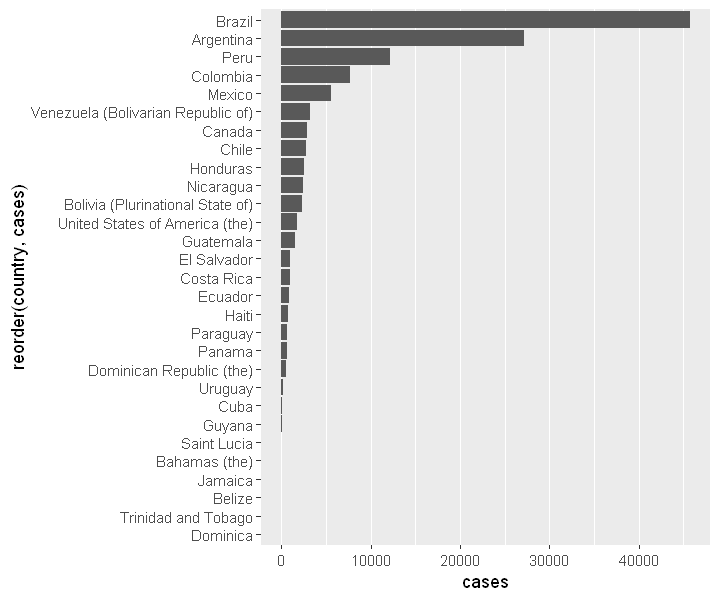

In [21]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=5)

amr_pertussis <- who_disease %>% 
filter(   # filter data to our desired subset
 region == 'AMR', 
 year == 1980, 
 disease == 'pertussis'
)

amr_pertussis %>% 
# filter to countries that had > 0 cases. 
filter(cases > 0) %>%
ggplot(aes(x = reorder(country, cases), y = cases)) +
geom_col() +
coord_flip() +
theme(
 # get rid of the 'major' y grid lines
 panel.grid.major.y  = element_blank()
)

#### 2.3.3) Converting to point chart
Our plot in the last exercise looked good, but what if we care about the values of the lower-end of the cases? It's hard for us to get a sense of their values because Brazil and Argentina are forcing the axis' upper range so high.

This is a good situation to switch to a log scale. However, remember that when on a log scale our stacking concept fails, so we should switch to a point chart! Note the additional filter added to the pipeline. What happens if you run the code without it?

This time, instead of modifying the data before sending to ggplot(), we will add scale_y_log10() to our plot and ggplot will take care of it for us.

To polish, use theme_minimal() to lighten the chart up and increase the size of the points from the default to 2.

**Exercise**  
1. Change the geometry from geom_col() to geom_point() .
2. Increase point size with size = 2.
3. Switch to a log scale with scale_y_log10().
4. Lighten the background with theme_minimal().

*Answears*

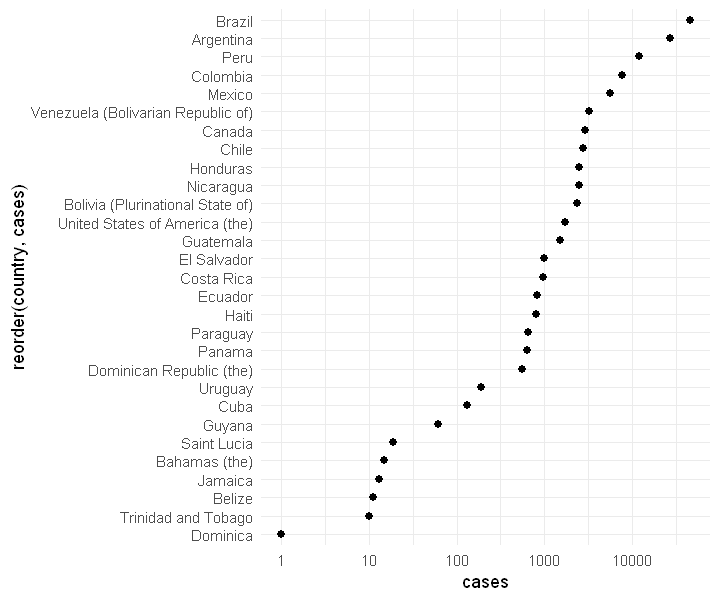

In [22]:
library(repr)

# Change plot size to 4 x 3
options(repr.plot.width=6, repr.plot.height=5)

amr_pertussis <- who_disease %>% 
filter(   # filter data to our desired subset
 region == 'AMR', 
 year == 1980, 
 disease == 'pertussis'
)

amr_pertussis %>% filter(cases > 0) %>% 
ggplot(aes(x = reorder(country, cases), y = cases)) + 
# switch geometry to points and set point size = 2
geom_point(size = 2) + 
# change y-axis to log10. 
scale_y_log10() +
# add theme_minimal()
theme_minimal() +
coord_flip()

## 3.0) Single Distributions
We now move on to visualizing distributional data, we expose the fragility of histograms, discuss when it is better to shift to a kernel density plots, and how to make both plots work best for your data

### 3.1) (video) Importance of distributions
Note: We'll be working with a new dataframe that unfortunately, we can´t access it

#### 3.1.3) Changing y-axis to density
By default, you will notice that the y-axis is the 'count' of points that fell within a given bin. This is nice and interpretable, but what if we wanted to interpret the plot as a true density curve like it's trying to estimate? I.e. all the (bar widths) * (bar heights) sum to 1?

To do this we simply add `y = stat(density)` to the aesthetic mappings, this will re-scale the y-axis from counts to an empirical probability estimate. Note this won't change the shape of the plot at all, but will simply give you a different interpretation of the y-axis.

Let's try it out on the hour of the day that a speeder was pulled over `(hour_of_day)`. In addition, lower the opacity of the bars a bit so the grid lines show through to allow easier comparisons.

**Exercise**  
1. set x-aesthetic to hour_of_day.
2. set the y-aesthetic to stat(density).
3. change the alpha value in geom_histogram() to 0.8.

*Answears*

    ggplot(md_speeding) +
    geom_histogram(
     # set x and y aesthetics to hour_of_day and stat(density) respectively.
     aes(x = hour_of_day, y = stat(density))
     # make points see-through by setting alpha to 0.8
     ,alpha = .8
    )

 ### 3.2) (video) Histogram Nuances

#### 3.2.1) Adjusting the bin numbers
Let's take our first steps away from the default number of bins with our histograms. We'll start by building a histogram of the percentage of the speed a driver is traveling over the limit for each citation. This is calculated as ((speed - speed_limit) / speed_limit)*100.

Plot percentage over the speed limit as a histogram with the number of bins set to 40. While you're at it, set the alpha to 0.8. You're entirely on your own with this one, no scaffolding.

**Exercise**  
1. Load md_speeding into ggplot() object.
2. Add a histogram geometry to plot.
3. Set x aes()thetic to percentage_over_limit.
4. Adjust settings for 40 bins and set alpha as 0.8.

  *Answears*
  
      # Load md_speeding into ggplot
      ggplot(md_speeding) +
      # add a geom_histogram with x mapped to percentage_over_limit
      geom_histogram(
       aes(x = percentage_over_limit),
       bins = 40,     # 40 binsset bin number to 40
       alpha = 0.8 )  # reduce alpha to 0.8

#### 3.2.3) Bin width by context
The supplied code looks at the distribution of citations by hour of the day. Notice how the bars don't fall nicely on a given hour; making the interpretation of the bar heights a bit ungainly. When your data has natural breakpoints like this, you should exploit them. In this case, we can set our breaks to fall on the hour boundaries.

Modify `geom_histogram()` to set the `binwidth` to `1` hour. This argument, however, doesn't tell ggplot where to start its bins, which by default is determined by the extent of the data. To fix this, set the `center` argument to `0.5`. This says you want one of the bars to be centered at 30 mins past midnight, ggplot then arranges the rest of the bars accordingly. (You could set this to be any hour + 0.5 such as 2.5, 3.5 etc..)

**Exercise**  
1. Set the binwidth of the plot to 1.
2. Center the bars on the half hour with the center argument.

*Answears*

      ggplot(md_speeding,aes(x = hour_of_day)) +
      geom_histogram(
       binwidth = 1,  # set binwidth to 1
       center = .5  # Center bins at the half (0.5) hour
      ) +
      scale_x_continuous(breaks = 0:24)

### 3.3) (video) The kernel density estimator
Now that we have seen where and how histogram fail, what are our alternatives,one of most popular is Kernel Density Estimator (KDE)

#### 3.3.1) Histogram to KDE
For these exercises, we will be looking at a subset of our data of citations handed out to `"Heavy Duty Truck"s`. We may be a data-savvy truck driver and want to know when the most dangerous time to be out on the road is. Note that the sample size here is only 32 observations.

Below is code to make a default histogram with ggplot. Unsurprisingly, it's not great. There's not really enough data to fill out even 30 bins, making it rather hard to read or get a grasp of the data. Switch the geometry to a KDE using `geom_density()`. Lastly, in an effort to maintain the most transparency with your visualization, add a subtitle to the plot telling the viewer the bin-width used for your KDE.

**Exercise**  
1. Change histogram geometry to a density one (geom_density()).
2. Modify the default bin width to be 1.5 units.
3. Add the subtitle "Gaussian kernel SD = 1.5"to your plot, telling the reader the binwidth of your kernel.

*Answears*

      orginal

      # filter data to just heavy duty trucks
      truck_speeding <- md_speeding %>% 
      filter(vehicle_type == "Heavy Duty Truck")

      ggplot(truck_speeding, aes(x = hour_of_day)) +
      # switch to density with bin width of 1.5, keep fill 
      geom_histogram(fill = 'steelblue') +
      # add a subtitle stating binwidth
      labs(title = 'Citations by hour')

      final

      # filter data to just heavy duty trucks
      truck_speeding <- md_speeding %>% 
      filter(vehicle_type == "Heavy Duty Truck")

      ggplot(truck_speeding, aes(x = hour_of_day)) +
      # switch to density with bin width of 1.5, keep fill 
      geom_density(bw = 1.5 ,fill = 'steelblue')+
      # add a subtitle stating binwidth
      labs(title = 'Citations by hour', subtitle = "Gaussian kernel SD = 1.5") 

#### 3.3.2) Putting a rug down
The plot we just made looks pretty good, but we can see a small hint of bi-modality between the hours of 10 and 15. Given we just are looking the blob of a density estimate it's hard to know how confident we are in that shape.

Let's alleviate this by doing a couple things.

First, lower the alpha on the density plot so we can more accurately locate these peaks using the background grid.

Next, add a rug-plot beneath the density plot using geom_rug(). To show any overlap that may occur in the rug plot set its alpha to 0.5.

The dataframe you made in the last exercise: truck_speeding has already been loaded for you.

**Exercise** 
1. Set alpha of density plot to 0.7.
2. Add geom_rug() to the plot.
3. Set alpha of rug plot to 0.5.

*Answears*

      ggplot(truck_speeding, aes(x = hour_of_day)) +
      # Adjust opacity to see gridlines with alpha = 0.7
      geom_density(bw = 1.5, fill = 'steelblue', alpha = 
                    .7) +
      # add a rug plot using geom_rug to see individual datapoints, set alpha to 0.5.
      geom_rug(alpha = .5) +
      labs(title = 'Citations by hour', subtitle = "Gaussian kernel SD = 1.5")

#### 3.3.3) KDE with lots of data
The code supplied will make a basic KDE of the `percentage_over_limit` for all citations. At first glance, the settings makes sense. We have a lot of data so we set our bin width nice and narrow: just one percent. Also, the rug plot, which has been thoughtfully added, has a lowered alpha of `0.7`.

Running this code, you will immediately see it's not a great plot. The density estimate looks like a porcupine and the rug plot is essentially a thick black bar due to massive overlap.

Fix it by upping the bin width a bit to `2.5` and lowering the `alpha` of the rug plot to `0.05` to try and get some sense of the point overlap. Don't forget to change the subtitle to reflect the change in the kernel width!

**Exercise** 
1. Change kernel sd to 2.5
2. Set alpha of rugplot to 0.05
3. Change the subtitle to "Gaussian kernel SD = 2.5" to reflect the new kernel width.

*Answears*

      ggplot(md_speeding, aes(x = percentage_over_limit)) +
      # Increase bin width 1 to 2.5
      geom_density(fill = 'steelblue', bw = 2.5,  alpha = 0.7) + 
      # lower rugplot alpha to 0.05
      geom_rug(alpha = 0.05) + 
      labs(
       title = 'Distribution of % over speed limit', 
       # modify subtitle to reflect change in kernel width
       subtitle = "Gaussian kernel SD = 2.5"
      )

## 4) Comparing Distributions
Finishing off we take a look at comparing multiple distributions to each other. We see why the traditional box plots are very dangerous and how to easily improve them, along with investigating when you should use more advanced alternatives like the beeswarm plot and violin plots.

### 4.1) (video) Intro to comparing distributions

#### 4.1.1) A simple boxplot
Let's get started by simply making a box plot similar to the ones we made in the slides.

Modify the `filter()` to look at 'RED' cars instead of blue and then map the x-axis to gender and the y-axis to driver speed. Add your boxplot geometry and give it a title.

**Exercise**  
*Answears*

    md_speeding %>% 
    filter(vehicle_color == 'RED') %>%
    # Map x and y to gender and speed columns respectively
    ggplot(aes(x = gender, y = speed)) + 
    # add a boxplot geometry
    geom_boxplot() +
    # give plot supplied title
    labs(title = 'Speed of red cars by gender of driver')


#### 4.1.2) Adding some jitter
We can improve the previous plot by adding jittered points behind the box plot. Make the jittered points a nice 'steelblue' color and set their alpha to 0.3 in order to visualize any overlap that may happen by chance.

You will also need to make the boxplot transparent in order to see the points that fall under the 'box' of the box plot.

**Exercise**  
1. Add geom_jitter() to the plot object before the boxplot geometry.
2. Set the color of the jittered points to 'steelblue' and the alpha to 0.3.
3. Make existing box plot transparent by setting alpha to 0.

*Answears*

      md_speeding %>% 
      filter(vehicle_color == 'RED') %>%
      ggplot(aes(x = gender, y = speed)) + 
      # add jittered points with alpha of 0.3 and color 'steelblue'
      geom_jitter(alpha = .3, color = 'steelblue') +
      # make boxplot transparent with alpha = 0
      geom_boxplot(alpha = 0) +
      labs(title = 'Speed of red cars by gender of driver')

#### 4.1.3) Faceting to show all colors
As we may expect, there doesn't appear to be too big of a difference in genders for red cars. What happens if we instead facet to look at this comparison across all the colors?

It's not uncommon when comparing distributions to want to look at a large number of conditions. When doing this faceting, we're looking at all 10k points.

**Exercise**  
1. Remove filter() for red cars.
2. Add a facet_wrap() by vehicle_color.
3. Change title to 'Speed of different car colors, separated by gender of driver'.

*Answears*

      # remove color filter
      md_speeding %>%
      ggplot(aes(x = gender, y = speed)) + 
      geom_jitter(alpha = 0.3, color = 'steelblue') +
      geom_boxplot(alpha = 0) +
      # add a facet_wrap by vehicle_color
      facet_wrap(~vehicle_color) +
      # change title to reflect new faceting
      labs(title = 'Speed of different car colors, separated by gender of driver')


### (video) 4.2 Beeswarms and violins
the first is a plot when you have a medium amount of observations and want to get sense of density among your groups 

note: if you want to use beeswarms, it´s necesary to load `library (ggbeeswarm)` and  use `geom_beeswarm()` function.

#### 4.2.1) Your first beeswarm
The following code makes a simple beeswarm plot for you of the gender speeding data, similar to what we saw in the last lesson.

You will notice that it doesn't look fantastic due to the stacking of the points causing overlap between the two genders' spreads.

Fix up this plot by reducing the size of the points using the `cex` argument to `0.5` and setting an opacity value for the points as to make the plots a little less harsh and emphasize the individual points.

In addition, add a transparent boxplot over the points to provide basic summary statistics as well.

**Exercise**  
1. Reduce size of points by setting cex = 0.5 in the beeswarm geometry.
2. Set the alpha of the points to 0.8 .
3. Add a transparent boxplot on top of the beeswarm.

*Answears*

      # Load library for making beeswarm plots
      library(ggbeeswarm)

      md_speeding %>% 
      filter(vehicle_color == 'RED') %>%
      ggplot(aes(x = gender, y = speed)) + 
      # change point size to 0.5 and alpha to 0.8
      geom_beeswarm(cex = .5, alpha = .8) +
      # add a transparent boxplot on top of points
      geom_boxplot(alpha = 0)

#### 4.2.2) Fiddling with a violin plot
The supplied code makes a simple violin plot of the same comparison we've been looking at.
  
Much like with `geom_density()`, ggplot has given us an unfilled (or at least white) shape. To make this more aesthetically pleasing, set the `fill` to 'steelblue'. Set the kernel SD to an intuitively reasonable value and make sure to state this kernel width in the subtitle of the plot.
  
In addition, let's attempt to replicate the rain-cloud plots from the density lesson and add (non-jittered) points back to the plot over the violins to attempt to see where interpolation is happening. Do this by simply adding a `geom_point()` geometry and setting the color to 'white', the `alpha` to 0.3 to show overlap, and the `size` to 0.5 to keep the points as unobtrusive as possible.


**Exercise**  
1. Swap geom_beeswarm() with geom_violin().
2. Set the kernel width (bw) of the violin plot to 2.5.
3. Add individual points underneath with geom_point().
4. Style individual points with alpha = 0.3, size = 0.5.

*Answears*

      md_speeding %>% 
      filter(vehicle_color == 'RED') %>%
      ggplot(aes(x = gender, y = speed)) + 
      # Replace beeswarm geometry with a violin geometry with kernel width of 2.5
      geom_violin(cex = 0.5, alpha = 0.7, fill = 'steelblue', bw = 2.5) +
      # add individual points on top of violins
      geom_point(alpha = .3, size = .5, color = 'white')

#### 4.2.3)  Violins with boxplots
If we still want the handy summary statistics that a box plot provides while not sacrificing the benefits of a violin plot, we can simply add a geom_boxplot() on top of the violin geometry in our plot object.

One issue we run into when doing this, however, is that the box plots are awkwardly wide. We only need to see where the horizontal lines are and not much more. Luckily, geom_boxplot() has the argument width, which scales the width of the boxplot (e.g. 0.5 = half-width).

Modify the plot we just made to have a boxplot between the violin and point geometries. In addition, change the points to have shape = 95 which is a horizontal tick mark. Lastly, we forgot to tell the user our kernel width, let's do that now.

**Exercise**  
1. Add a geom_boxplot() between violin and point geometries.
2. Set box alpha to 0 and width to 0.3.
3. Change point geometry to shape = 95 and delete size argument.
4. Give plot a subtitle with labs(subtitle = 'Gaussian kernel SD = 2.5').

*Answears*

      md_speeding %>% 
      filter(vehicle_color == 'RED') %>%
      ggplot(aes(x = gender, y = speed)) + 
      geom_violin(bw = 2.5) +
      # add a transparent boxplot and shrink its width
      geom_boxplot(alpha = 0, width = 0.3) + 
      # Reset point size to default and set point shape to 95.
      geom_point(alpha = 0.3, shape = 95) + 
      # Supply a subtitle detailing the kernel width
      labs(subtitle = 'Gaussian kernel SD = 2.5')

#### 4.2.4) Comparing lots of distributions
Let's revisit the faceted plot we made before, but now with our handy new techniques. Can we get a better handle on the relationships with our new plot types?

The supplied code makes the same visualization you did in the last lesson. Change the code to use violin plots to display the density instead of jitter plots to draw the individual data. Like in the last exercise, shrink the box plot width so they mostly sit within the violin plots. Last, don't forget to add a subtitle to the plot telling the viewer the width of your violin plot kernels!

**Exercise**  
1. Replace geom_jitter() with geom_violin().
2. Set fill = 'steelblue' and kernel standard deviation of 2.5 for the violin geometry.
3. Shrink geom_boxplot() width by setting it to 0.3.
4. Add the subtitle Gaussian kernel width: 2.5'.

*Answears*

      md_speeding %>% 
      ggplot(aes(x = gender, y = speed)) + 
      # replace with violin plot with kernel width of 2.5, change color argument to fill 
      geom_violin(bw = 2.5, fill = "steelblue") +
      # reduce width to 0.3
      geom_boxplot(alpha = 0, width = .3) +
      facet_wrap(~vehicle_color) +
      labs(
       title = 'Speed of different car colors, separated by gender of driver',
       # add a subtitle w/ kernel width
       subtitle = "Gaussian kernel width: 2.5"
      )

### 4.3 ) (video) Comparing spatially related distributions

#### 4.3.1) A basic ridgeline plot
Supplied is code to make a ridgeline plot looking at the percentage over the limit drivers were pulled over going by day of the week.

Modify the code to set the kernel width (bandwidth) to a specified value, change the x-axis limits to get rid of the long tails, and also add a subtitle letting the reader know the bandwidth you are using.

**Exercise**  
1. Change the bandwidth to 3.5 in geom_density_ridges().
2. Set the limits of the x-scale to 0 to 150.
3. Give plot the subtitle 'Gaussian kernel SD = 3.5'.

*Answears*

      library(ggridges)

      md_speeding %>% 
      mutate(day_of_week = factor(day_of_week, levels = c("Mon","Tues","Wed","Thu","Fri","Sat","Sun") )) %>% 
      ggplot(aes( x = percentage_over_limit, y = day_of_week)) + 
      # Set bandwidth to 3.5
      geom_density_ridges(bandwidth = 3.5) +
      # add limits of 0 to 150 to x-scale
      scale_x_continuous(limits = c(0,150)) +
      # provide subtitle with bandwidth
      labs(subtitle = 'Gaussian kernel SD = 3.5')

#### 4.3.2) Cleaning up your ridgelines
Let's modify the plot from the last exercise, even more, to make it prettier and easier to read.

To do this, make the densities a bit transparent to help avoid overlapping issues by modifying the alpha value in the ridgeline geometry. Next, get rid of the extra space that ggplot puts around the extremes of the data to avoid the awkward empty strip on the right and left where the densities don't interpolate. Finally, use the theme() function to remove the y-axis ticks because the density lines already serve the purpose to point to the y-axis labels.

The ggridges library is already loaded for you.

**Exercise**  
1. Set alpha of geom_density_ridges() to 0.7.
2. Set expand = c(0,0) in the scale_x_continuous() call.
3. Remove axis.ticks.y in the theme() function.

*Answears*

      md_speeding %>% 
      mutate(day_of_week = factor(day_of_week, levels = c("Mon","Tues","Wed","Thu","Fri","Sat","Sun") )) %>% 
      ggplot(aes( x = percentage_over_limit, y = day_of_week)) + 
      # make ridgeline densities a bit see-through with alpha = 0.7
      geom_density_ridges(bandwidth = 3.5, alpha = 0.7) +
      # set expand values to c(0,0)
      scale_x_continuous(limits = c(0,150), expand = c(0,0)) +
      labs(subtitle = 'Guassian kernel SD = 3.5') +
      # remove y axis ticks
      theme(axis.ticks.y = element_blank())

#### 4.3.3) Making it rain (datapoints)
The increased bi-modality we see early in the week could be compelling, but we should draw individual points below the densities in order to get a sense of what the KDE is doing in terms of interpolation before calling it a day.

Added to the previous exercises' code is a point geometry to do just this. You will notice it doesn't look very good. To make it better we will do a few things...

First, lower the point alphas slightly to visualize overlap. Second, switch the point shape to the geom_rug() style vertical lines ('|').

At this stage, if you run the code you will see the points awkwardly clip the density shapes. We need to 'nudge' the tick marks down the y-axis a tiny bit. To do this we can use the position argument and the helper function position_nudge().    

**Exercise**  
1. Lower alpha of the points to 0.2 to show overlap.
2. Change the line shape to '|' for more efficient space utilization.
3. Push points down so they don't overlap the density shape with 
position = position_nudge(y = -0.05)


  *Answears*
  
      md_speeding %>% 
      mutate(day_of_week = factor(day_of_week, levels = c("Mon","Tues","Wed","Thu","Fri","Sat","Sun") )) %>% 
      ggplot(aes( x = percentage_over_limit, y = day_of_week)) + 
      geom_point(
      # make semi-transparent with alpha = 0.2
      alpha = 0.2,
      # turn points to vertical lines with shape = '|'
      shape = "|",
      # nudge the points downward by 0.05
      position = position_nudge(y = -0.05)
      ) +
      geom_density_ridges(bandwidth = 3.5, alpha = 0.7) +
      scale_x_continuous(limits = c(0,150), expand  = c(0,0)) +
      labs(subtitle = 'Guassian kernel SD = 3.5') +
      theme( axis.ticks.y = element_blank() )


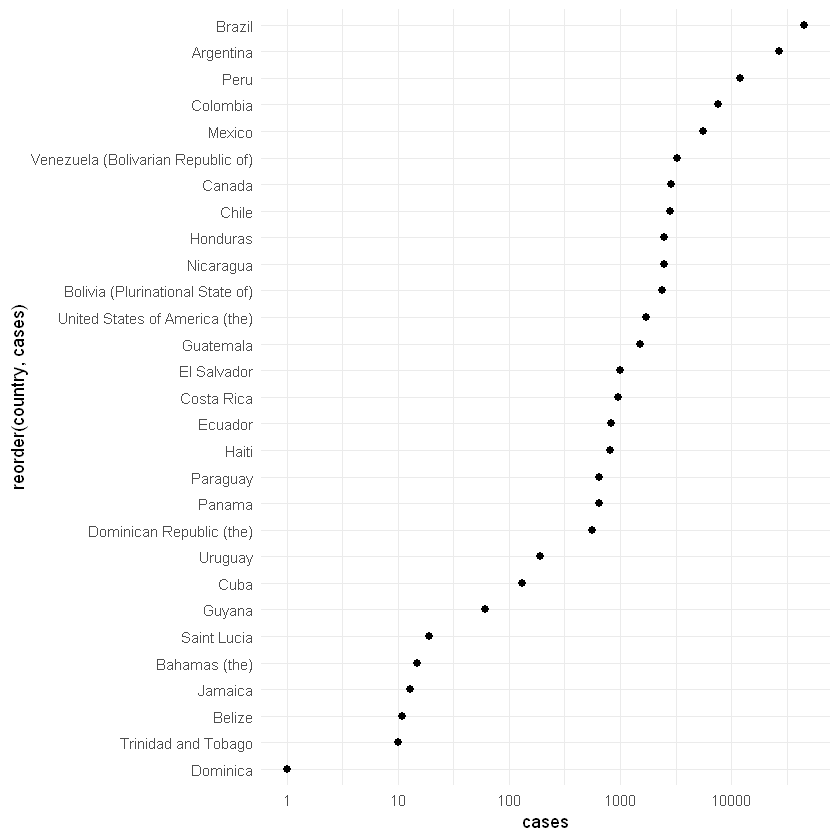

In [4]:
    amr_pertussis <- who_disease %>% 
            filter(   # filter data to our desired subset
                region == 'AMR', 
                year == 1980, 
                disease == 'pertussis'
            )

    amr_pertussis %>% filter(cases > 0) %>% 
        ggplot(aes(x = reorder(country, cases), y = cases)) + 
        # switch geometry to points and set point size = 2
        geom_point(size = 2) + 
        # change y-axis to log10. 
        scale_y_log10() +
        # add theme_minimal()
        theme_minimal() +
        coord_flip()